<a href="https://colab.research.google.com/github/preethi-30-2006/Retail-Sales-EDA-Project/blob/main/EDA_Retail_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plotting style for professional visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

# Load the dataset
file_name = "retail_sales_dataset.csv"
try:
    df = pd.read_csv(file_name)
    print(f"Successfully loaded {file_name}. Dataset size: {len(df)} rows.")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Please ensure it is uploaded.")
    exit()

Successfully loaded retail_sales_dataset.csv. Dataset size: 1000 rows.


In [3]:
print("\n--- 1. Data Cleaning and Feature Engineering ---")

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create 'Total Amount' column (recalculate for robustness, even if it exists)
df['Total Amount'] = df['Quantity'] * df['Price per Unit']

# Extract time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.to_period('M')
df['DayOfWeek'] = df['Date'].dt.day_name()

# Check for missing values and inconsistencies
print("\nMissing values per column:")
print(df.isnull().sum())


--- 1. Data Cleaning and Feature Engineering ---

Missing values per column:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Year                0
Month               0
DayOfWeek           0
dtype: int64


In [4]:
print("\n--- 2. Descriptive Statistics for Sales Metrics ---")
print(df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].describe().T)

print("\nProduct Category Counts:")
print(df['Product Category'].value_counts())


--- 2. Descriptive Statistics for Sales Metrics ---
                 count     mean         std   min   25%    50%    75%     max
Age             1000.0   41.392   13.681430  18.0  29.0   42.0   53.0    64.0
Quantity        1000.0    2.514    1.132734   1.0   1.0    3.0    4.0     4.0
Price per Unit  1000.0  179.890  189.681356  25.0  30.0   50.0  300.0   500.0
Total Amount    1000.0  456.000  559.997632  25.0  60.0  135.0  900.0  2000.0

Product Category Counts:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64



--- 3. Time Series Analysis ---


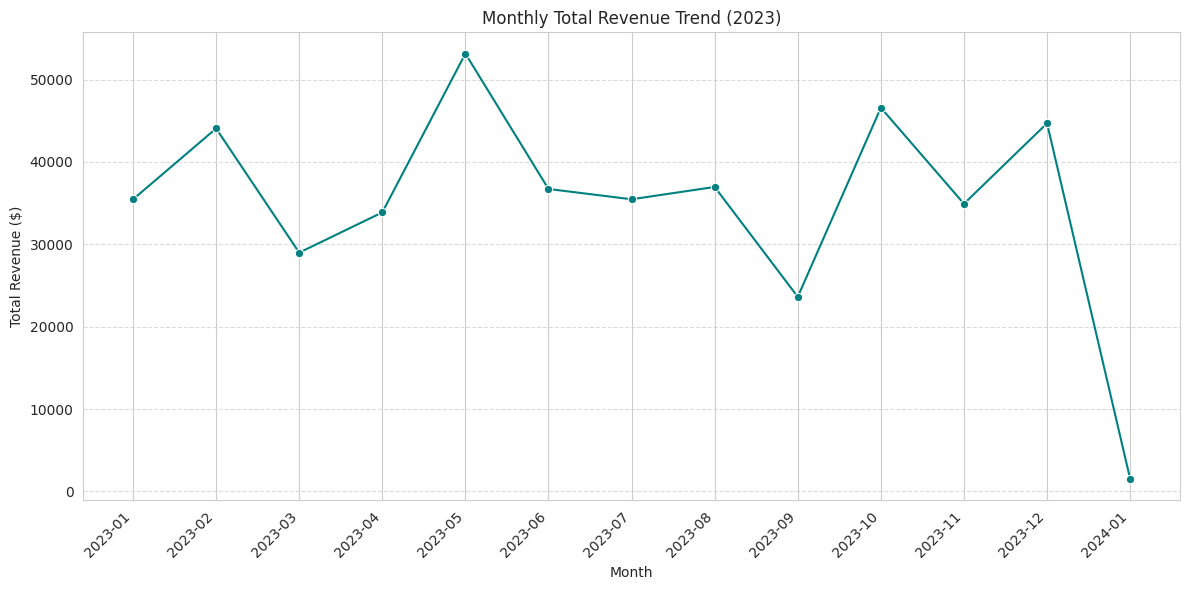

/tmp/ipython-input-4253557075.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='Total Amount', data=sales_by_day, palette='cividis')


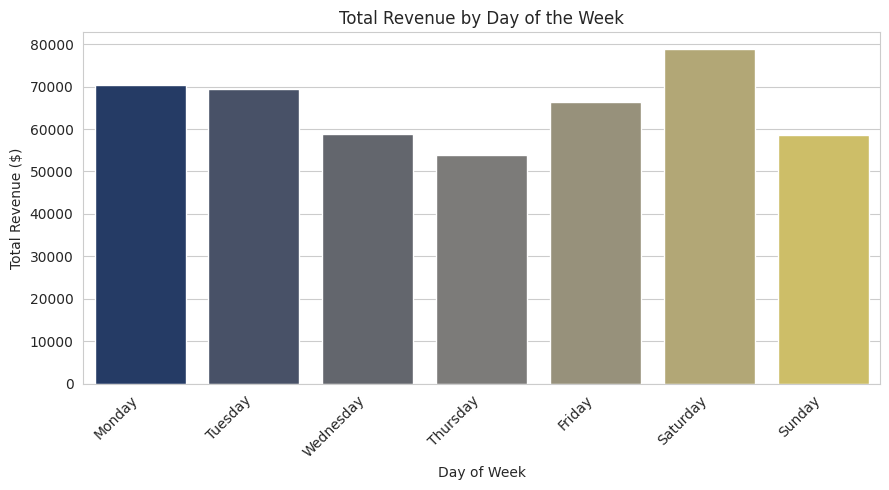

In [5]:
print("\n--- 3. Time Series Analysis ---")

# A. Monthly Sales Trend (Seasonality)
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str) # Convert Period to string for plotting

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total Amount', data=monthly_sales, marker='o', color='teal')
plt.title('Monthly Total Revenue Trend (2023)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('monthly_sales_trend_line_plot.png')
plt.show()

# B. Weekly Sales Trend (Daily Patterns)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = df.groupby('DayOfWeek')['Total Amount'].sum().reindex(day_order).reset_index()

plt.figure(figsize=(9, 5))
sns.barplot(x='DayOfWeek', y='Total Amount', data=sales_by_day, palette='cividis')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('sales_by_dayofweek_bar_chart.png')
plt.show()


--- 4. Customer and Product Analysis ---


/tmp/ipython-input-350782529.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Category', y='Total Amount', data=sales_by_category, palette='viridis')


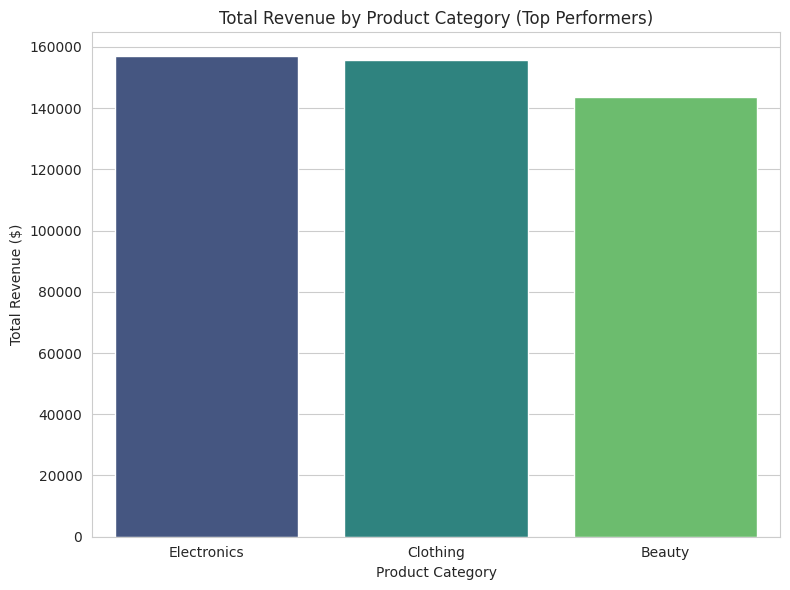

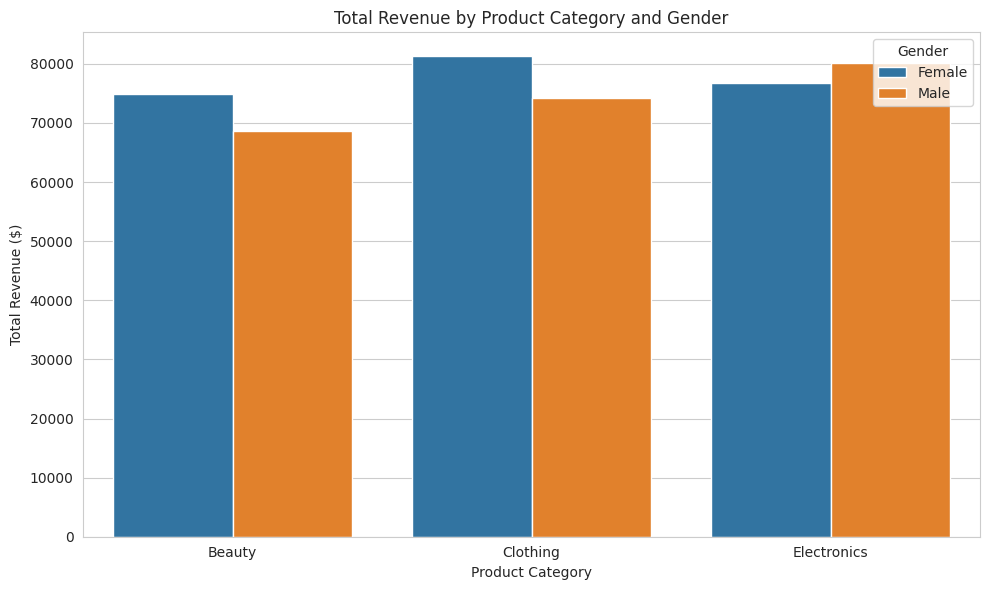

In [6]:
print("\n--- 4. Customer and Product Analysis ---")

# A. Overall Revenue by Product Category
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Product Category', y='Total Amount', data=sales_by_category, palette='viridis')
plt.title('Total Revenue by Product Category (Top Performers)')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Product Category')
plt.tight_layout()
plt.savefig('revenue_by_category_bar_chart.png')
plt.show()

# B. Revenue by Product Category and Gender Segmentation
sales_gender_category = df.groupby(['Product Category', 'Gender'])['Total Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', hue='Gender', data=sales_gender_category)
plt.title('Total Revenue by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue ($)')
plt.tight_layout()
plt.savefig('revenue_by_category_gender_bar_chart.png')
plt.show()


--- 5. Correlation Analysis ---

Correlation Matrix:
                     Age  Quantity  Price per Unit  Total Amount
Age             1.000000 -0.023737       -0.038423     -0.060568
Quantity       -0.023737  1.000000        0.017501      0.373707
Price per Unit -0.038423  0.017501        1.000000      0.851925
Total Amount   -0.060568  0.373707        0.851925      1.000000


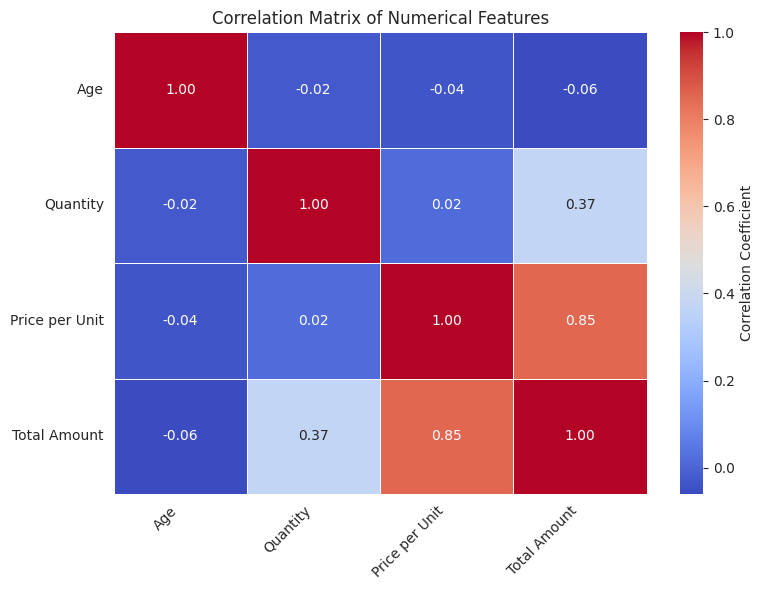


--- EDA Complete ---
Check the current directory for 5 generated image files (.png) containing the visualizations.


In [7]:
print("\n--- 5. Correlation Analysis ---")

# Select numerical features for correlation
numerical_df = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]
correlation_matrix = numerical_df.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix.to_string())

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('numerical_correlation_heatmap.png')
plt.show()

print("\n--- EDA Complete ---")
print("Check the current directory for 5 generated image files (.png) containing the visualizations.")